In [156]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import math


In [158]:
# Import audio
audioFile = "audio_mono.wav"
ipd.Audio(audioFile)

audioFile2 = "audo3_mono.wav"
ipd.Audio(audioFile2)

In [159]:
# Calculate Short-Time Fourier Transform of audio
audioArray, sampleRate = librosa.load(audioFile)
audio2Array, sampleRate2 = librosa.load(audioFile2)

frameSize = 2048
hopSize = 512

audioSTFT = librosa.stft(audioArray, n_fft=frameSize, hop_length=hopSize)
audio2STFT = librosa.stft(audio2Array, n_fft=frameSize, hop_length=hopSize)


In [41]:
#Plot Spectrogram
def plotLogSpectrogram(Y, sampleRate, hopSize, yAxis):
    plt.figure(figsize=(15,5))
    librosa.display.specshow(Y,sr=sampleRate,hop_length=hopSize,x_axis="time",y_axis=yAxis)
    plt.colorbar(format='%+2.0f dB')

In [32]:
no_bands = 3
bands = []

for i in range(no_bands):
    #why frameSize/2 ?
    bottom = math.floor(((frameSize/2)/no_bands) * (i))
    top = math.floor(((frameSize/2)/no_bands) * (i+1))

    print(bottom, top)
    
    band = np.copy(audioSTFT)
    band[top:,:] = 0
    band[:bottom,:] = 0

    bands.append(band)

0 341
341 682
682 1024


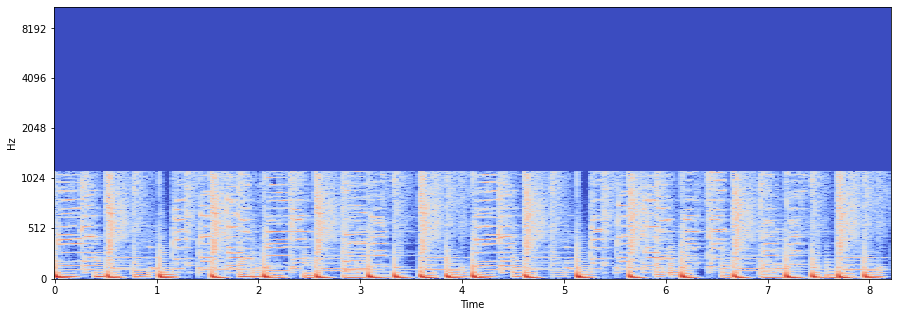

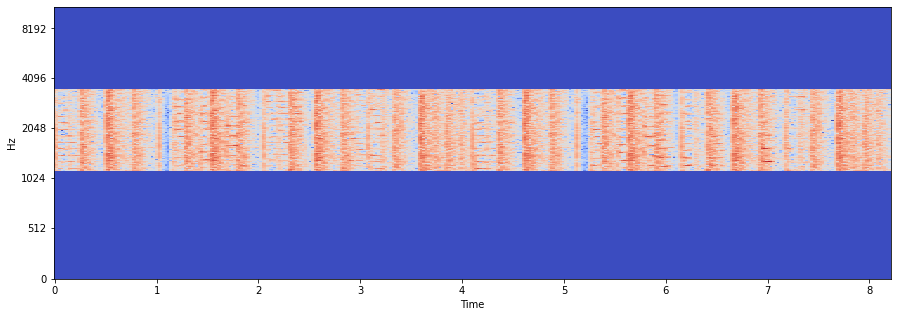

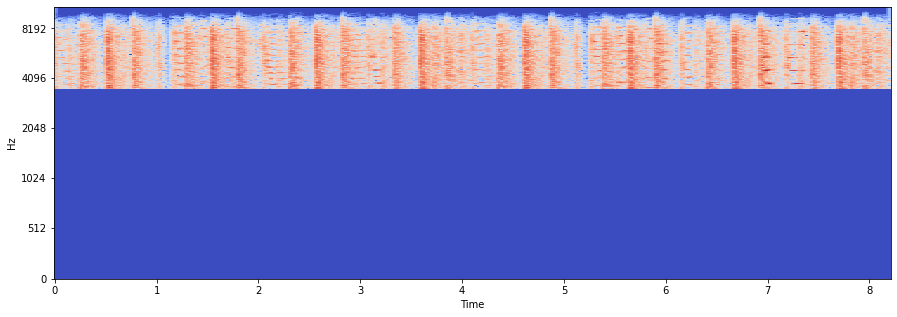

In [33]:
for band in bands:
    # Calculate Spectrogram
    spectrogram = librosa.power_to_db(np.abs(band)**2)
    plotLogSpectrogram(spectrogram, sampleRate, hopSize, yAxis="mel")

In [34]:
ipd.Audio(librosa.istft(bands[2],n_fft=frameSize, hop_length=hopSize), rate=sampleRate)

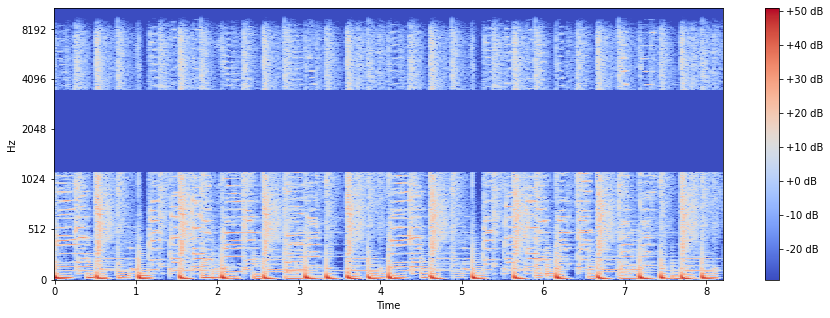

In [42]:
bands[1] = bands[1] * 0.1
recombined = sum(bands)

# Calculate Spectrogram
spectrogram = librosa.power_to_db(np.abs(recombined)**2)
plotLogSpectrogram(spectrogram, sampleRate, hopSize, yAxis="mel")

In [36]:
recombined_inverse = librosa.istft(recombined,n_fft=frameSize, hop_length=hopSize)
ipd.Audio(recombined_inverse, rate=sampleRate)

<h1>PARAMETRIC EQ</h1>

In [264]:
bands = [
{
  "peak": 0.05,
  "frequency": 200,
  "bandwidth": 200
},
{
  "peak": 0.4,
  "frequency": 500,
  "bandwidth": 200
},
{
  "peak": 0.1,
  "frequency": 700,
  "bandwidth": 50
},]

In [265]:
signal = np.copy(audioSTFT)

for bandparams in bands:
    band = np.ones(signal.shape)
    bottom_frequency = bandparams["frequency"]-(math.floor(bandparams["bandwidth"]/2))
    top_frequency = bandparams["frequency"]+(math.floor(bandparams["bandwidth"]/2))
    band[bottom_frequency:top_frequency,:] = bandparams["peak"]

    signal = signal * band

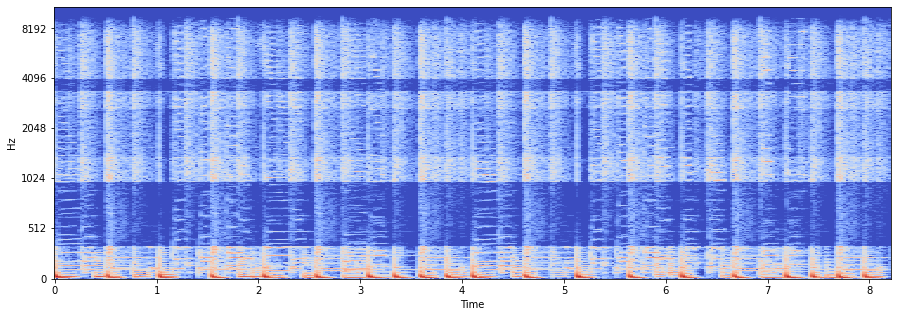

In [266]:
# Calculate Spectrogram
spectrogram = librosa.power_to_db(np.abs(signal)**2)
plotLogSpectrogram(spectrogram, sampleRate, hopSize, yAxis="mel")

In [267]:
signal_inverse = librosa.istft(signal,n_fft=frameSize, hop_length=hopSize)
ipd.Audio(signal_inverse, rate=sampleRate)

<h1>FTT MATCHING</h1>

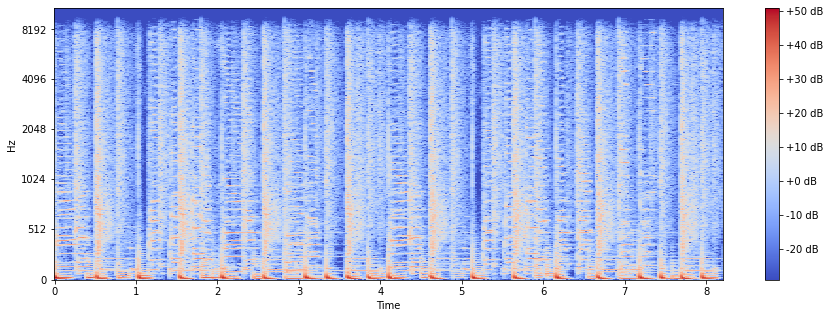

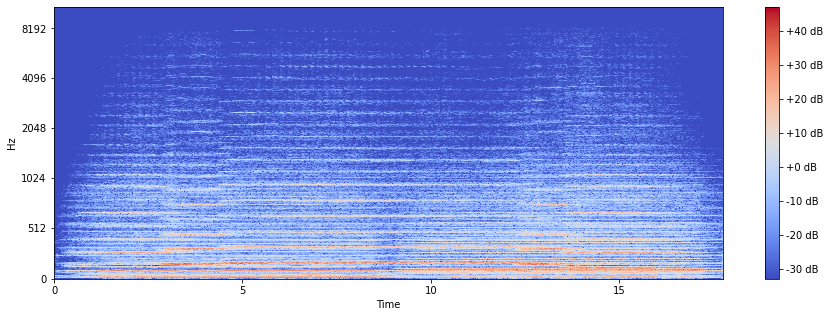

In [160]:
# Calculate Spectrogram
spectrogram = librosa.power_to_db(np.abs(audioSTFT)**2)
plotLogSpectrogram(spectrogram, sampleRate, hopSize, yAxis="mel")

spectrogram = librosa.power_to_db(np.abs(audio2STFT)**2)
plotLogSpectrogram(spectrogram, sampleRate, hopSize, yAxis="mel")

In [188]:
audioDFT = librosa.stft(audioArray, n_fft=frameSize, hop_length=10000000000)

audio2DFT = librosa.stft(audio2Array, n_fft=frameSize, hop_length=10000000000)


#audio2DFT = librosa.stft(audioArray, n_fft=frameSize, hop_length=10000000000)
#audio2DFT[200:600] = audio2DFT[200:600] * 0.01


In [189]:
eq_curve = audio2DFT / audioDFT

eq_curve.shape

(1025, 1)

In [193]:
eq_curve = np.ravel(eq_curve)

kernel_size = 100
kernel = np.ones(kernel_size) / kernel_size
eq_curve = np.convolve(eq_curve, kernel, mode='same')
eq_curve = eq_curve.reshape(len(eq_curve),1)

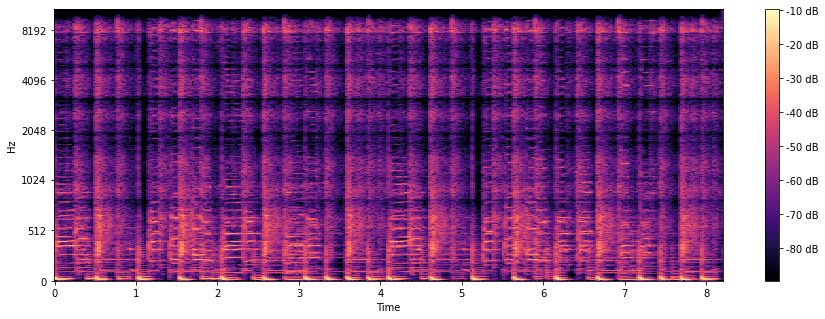

In [191]:
EQ_STFT = audioSTFT * eq_curve

# Calculate Spectrogram
spectrogram = librosa.power_to_db(np.abs(EQ_STFT)**2)
plotLogSpectrogram(spectrogram, sampleRate, hopSize, yAxis="mel")

In [192]:
inverse = librosa.istft(EQ_STFT,n_fft=frameSize, hop_length=hopSize)
ipd.Audio(inverse, rate=sampleRate)